# Convergence analysis for Newmark standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.colors as colors

sns.set_theme(style="whitegrid")

In [ ]:
csv_path = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv')
df = pd.read_csv(csv_path)
# Drop duplicates keeping the last entry
df = df.drop_duplicates(subset=['h', 'N_el_x', 'N_el_y', 'r', 'dt', 'T', 'method'], keep='last')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv'

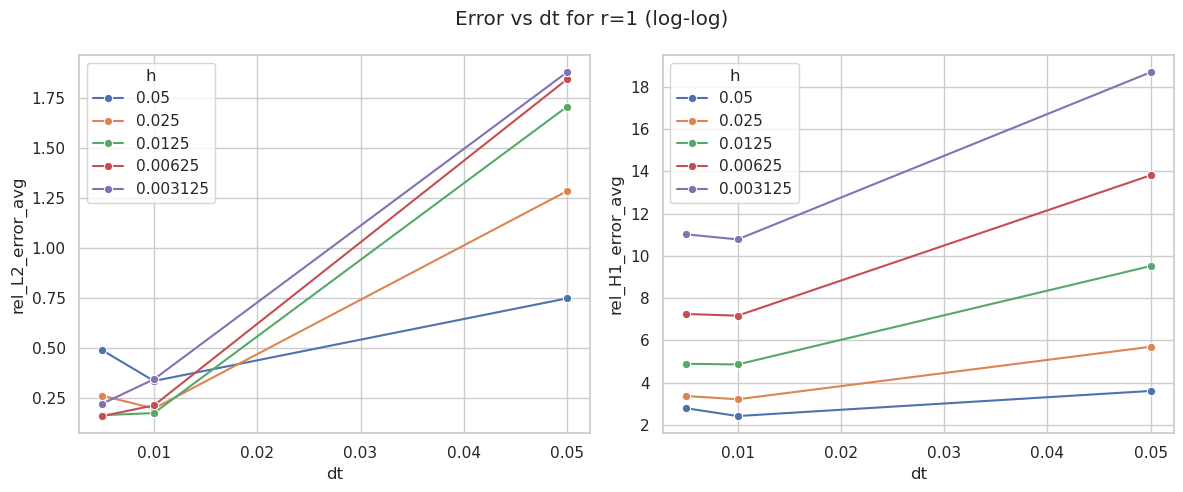

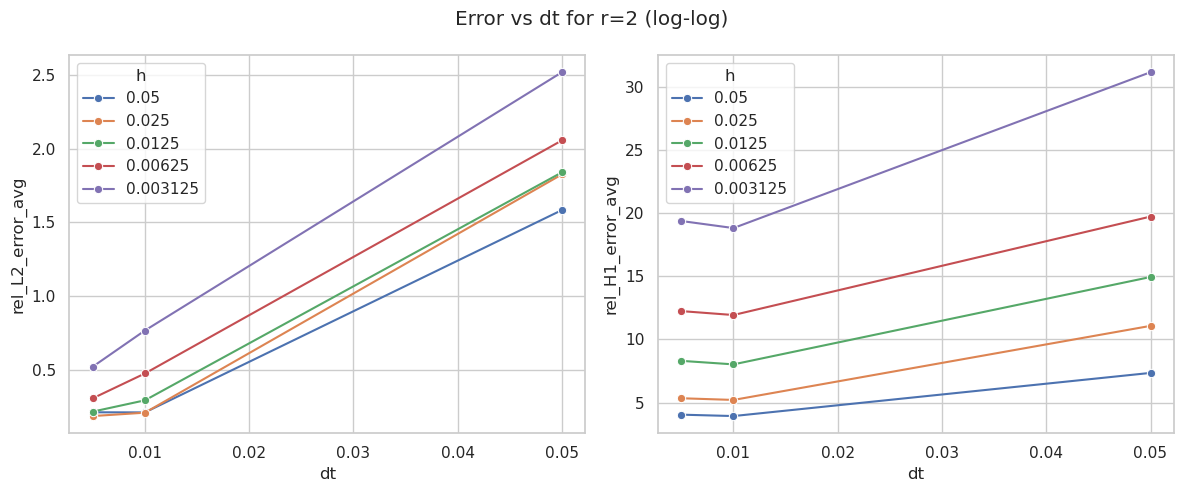

In [ ]:
# Errors vs dt separated by r using seaborn
figs = []
for r_val in sorted(df['r'].unique()):
    sub = df[df['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
        ax.set_xscale('log'); ax.set_yscale('log')
        ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs.append(fig)

/tmp/ipykernel_106657/2922173873.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_dt = df.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)


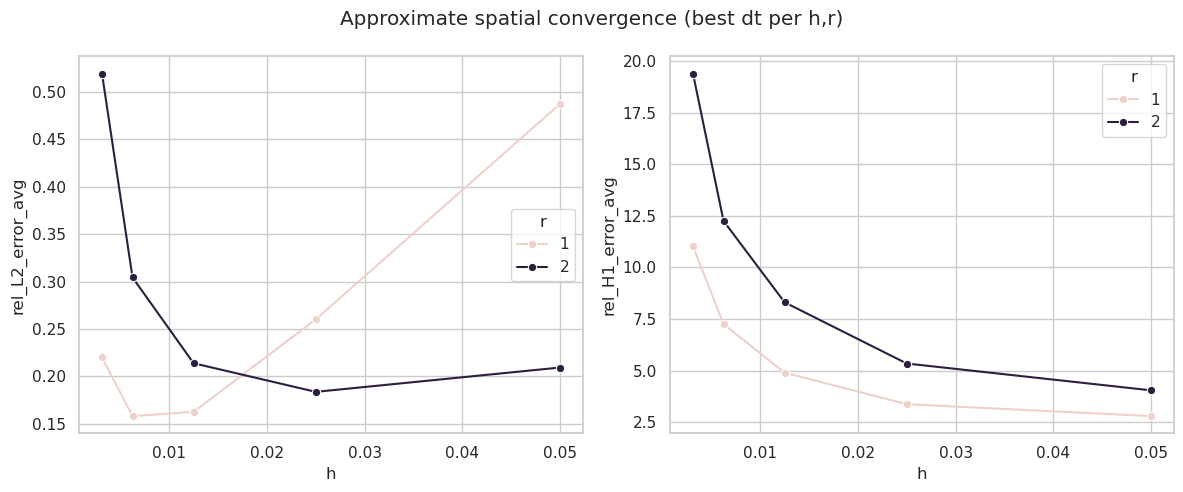

In [ ]:
# Spatial convergence: pick smallest dt per (h, r) to approximate spatial error using seaborn
best_dt = df.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.lineplot(data=best_dt, x='h', y='rel_L2_error_avg', hue='r', marker='o', ax=axes[0])
sns.lineplot(data=best_dt, x='h', y='rel_H1_error_avg', hue='r', marker='o', ax=axes[1])
for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel('h'); ax.set_ylabel(ylabel)
axes[0].legend(title='r'); axes[1].legend(title='r')
fig.suptitle('Approximate spatial convergence (best dt per h,r)');
plt.tight_layout()

# Convergence analysis for Theta standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [16]:
csv_path_theta = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/theta-standing-mode-wsol/convergence.csv')
df_theta = pd.read_csv(csv_path_theta)
# Drop duplicates keeping the last entry
df_theta = df_theta.drop_duplicates(subset=['h', 'N_el_x', 'N_el_y', 'r', 'dt', 'T', 'method'], keep='last')
df_theta.head()

,h,N_el_x,N_el_y,r,dt,T,method,rel_L2_error_avg,rel_H1_error_avg
30,0.05,20,20,1,0.050,1,theta-standing-mode-wsol,0.010334,0.077692
31,0.05,20,20,1,0.010,1,theta-standing-mode-wsol,0.014965,0.078635
32,0.05,20,20,1,0.005,1,theta-standing-mode-wsol,0.027722,0.090682
33,0.05,20,20,2,0.050,1,theta-standing-mode-wsol,0.038694,0.038833
34,0.05,20,20,2,0.010,1,theta-standing-mode-wsol,0.000692,0.002561


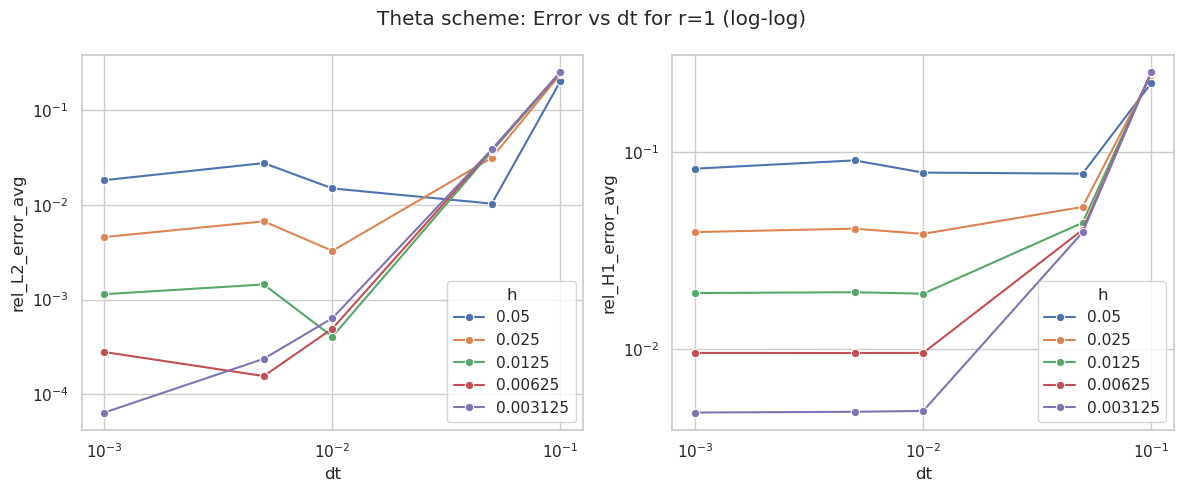

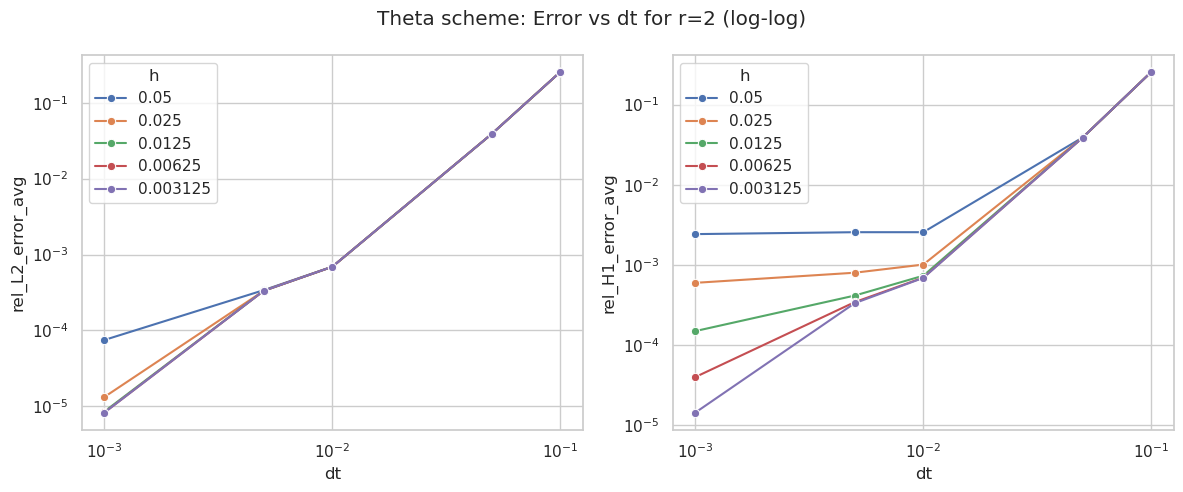

In [17]:
# Errors vs dt separated by r for theta scheme using seaborn
figs_theta = []
for r_val in sorted(df_theta['r'].unique()):
    sub = df_theta[df_theta['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
        ax.set_xscale('log'); ax.set_yscale('log')
        ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Theta scheme: Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs_theta.append(fig)

/tmp/ipykernel_13081/573947026.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_dt_theta = df_theta.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)


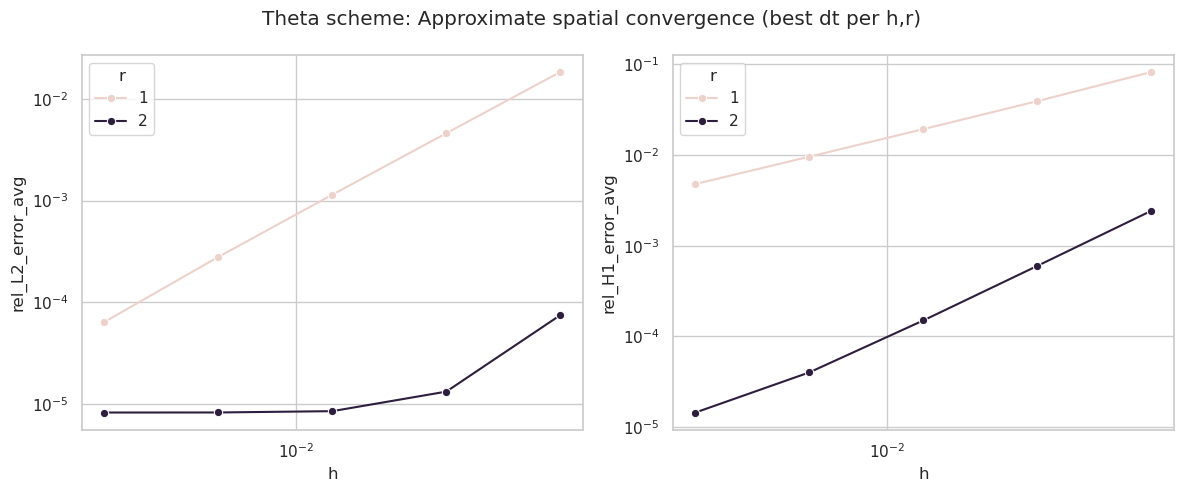

In [18]:
# Spatial convergence for theta: pick smallest dt per (h, r) to approximate spatial error using seaborn
best_dt_theta = df_theta.groupby(['h', 'r']).apply(lambda g: g.loc[g['dt'].idxmin()]).reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.lineplot(data=best_dt_theta, x='h', y='rel_L2_error_avg', hue='r', marker='o', ax=axes[0])
sns.lineplot(data=best_dt_theta, x='h', y='rel_H1_error_avg', hue='r', marker='o', ax=axes[1])
for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel('h'); ax.set_ylabel(ylabel)
axes[0].legend(title='r'); axes[1].legend(title='r')
fig.suptitle('Theta scheme: Approximate spatial convergence (best dt per h,r)');
plt.tight_layout()

## Heatmap view of errors vs (dt, h) for Newmark
Log-scaled colorbars help compare error ranges across parameters.

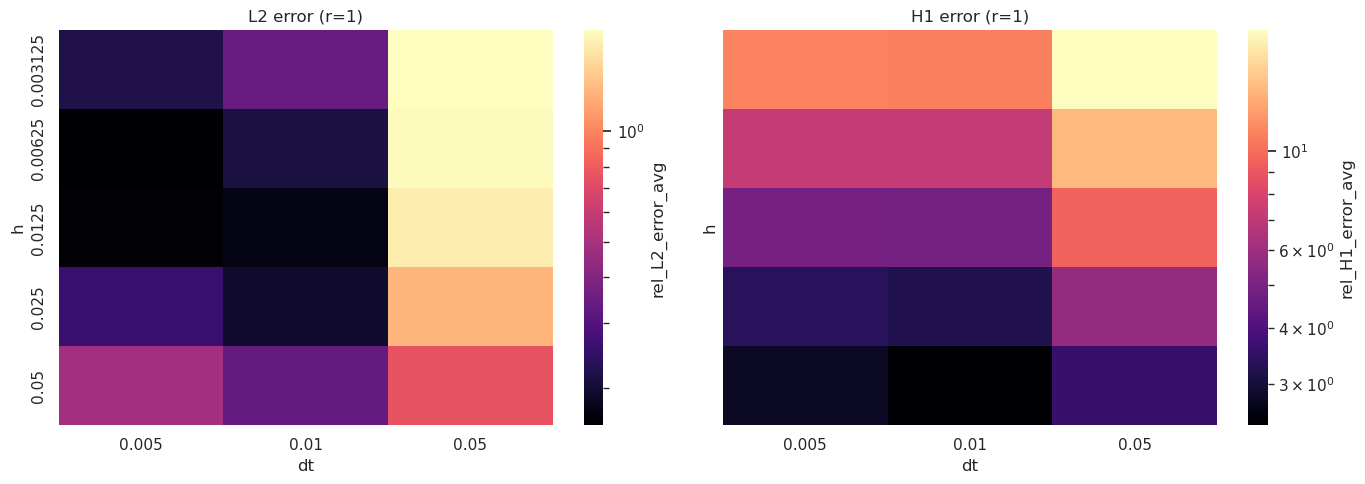

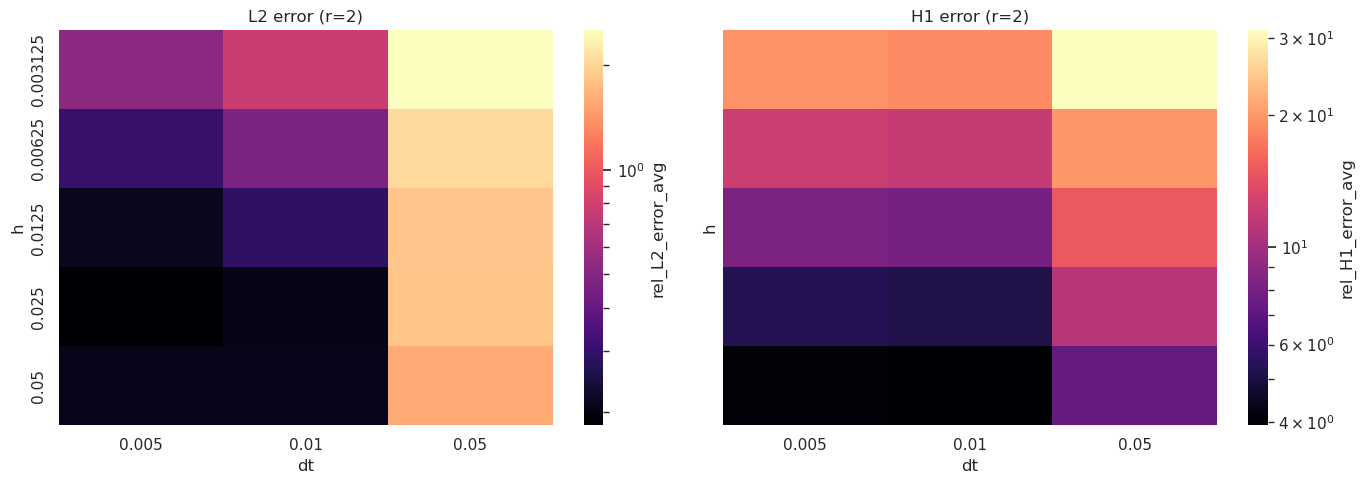

In [ ]:
# Determine common limits for color scaling across both methods
l2_min = min(df_theta['rel_L2_error_avg'].min(), df_theta['rel_L2_error_avg'].min())
l2_max = max(df_theta['rel_L2_error_avg'].max(), df_theta['rel_L2_error_avg'].max())
h1_min = min(df_theta['rel_H1_error_avg'].min(), df_theta['rel_H1_error_avg'].min())
h1_max = max(df_theta['rel_H1_error_avg'].max(), df_theta['rel_H1_error_avg'].max())

for r_val in sorted(df['r'].unique()):
    sub = df[df['r'] == r_val].copy()
    pivot_l2 = sub.pivot_table(index='h', columns='dt', values='rel_L2_error_avg')
    pivot_h1 = sub.pivot_table(index='h', columns='dt', values='rel_H1_error_avg')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=True)
    sns.heatmap(pivot_l2, ax=axes[0], cmap='magma', norm=colors.LogNorm(vmin=l2_min, vmax=l2_max), cbar_kws={'label': 'rel_L2_error_avg'})
    sns.heatmap(pivot_h1, ax=axes[1], cmap='magma', norm=colors.LogNorm(vmin=h1_min, vmax=h1_max), cbar_kws={'label': 'rel_H1_error_avg'})
    axes[0].set_title(f'L2 error (r={r_val})'); axes[1].set_title(f'H1 error (r={r_val})')
    axes[0].set_xlabel('dt'); axes[1].set_xlabel('dt'); axes[0].set_ylabel('h')
    plt.tight_layout()

## Heatmap view of errors vs (dt, h) for Theta scheme
Same layout as Newmark to compare across parameters.

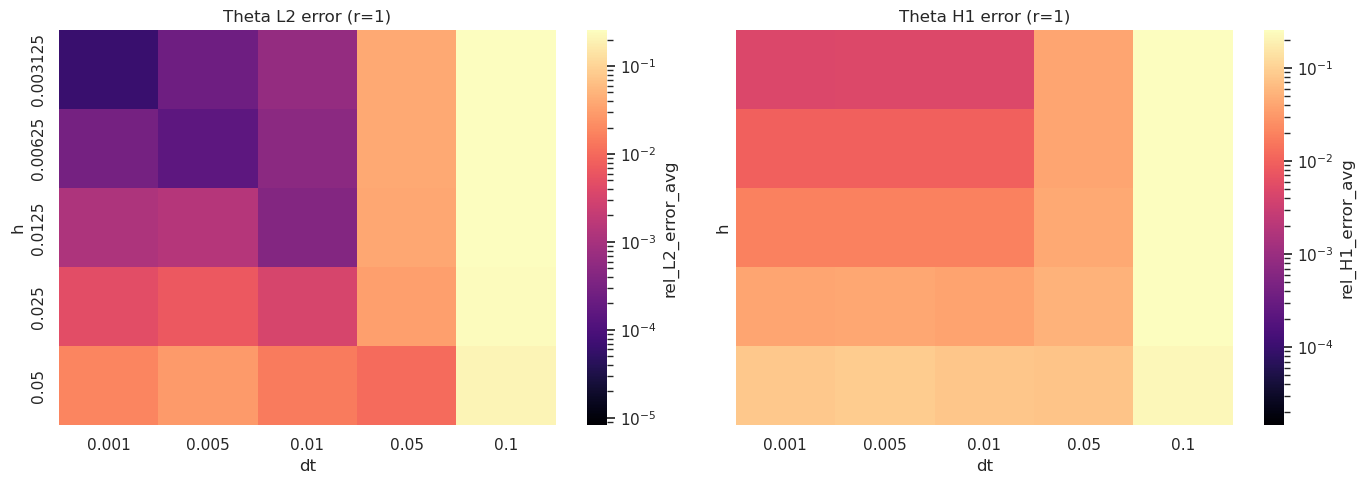

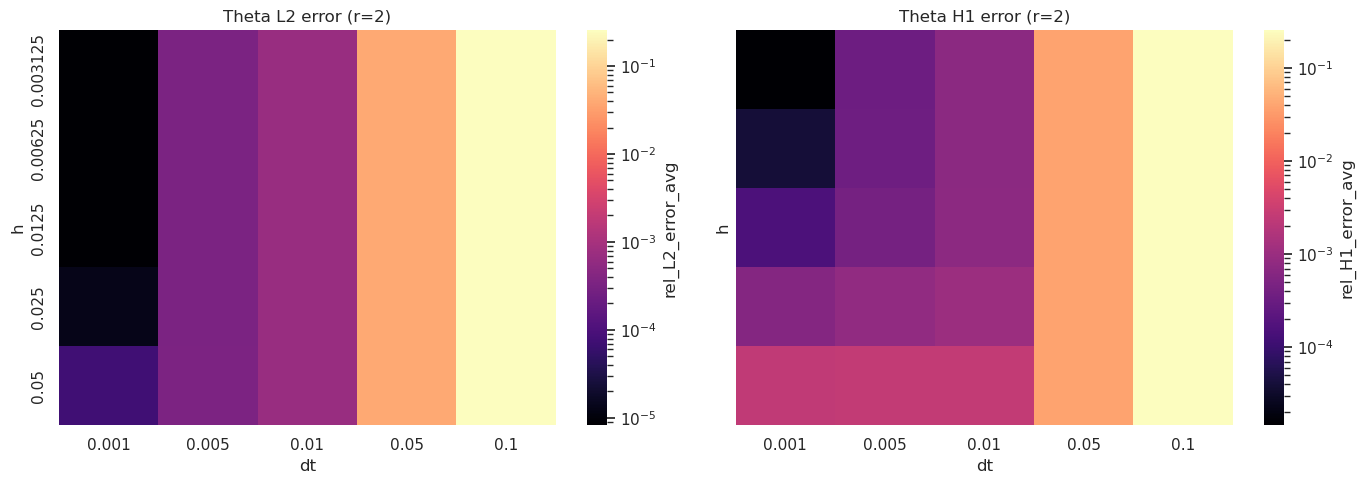

In [21]:
# Determine common limits for color scaling across both methods
l2_min = min(df_theta['rel_L2_error_avg'].min(), df_theta['rel_L2_error_avg'].min())
l2_max = max(df_theta['rel_L2_error_avg'].max(), df_theta['rel_L2_error_avg'].max())
h1_min = min(df_theta['rel_H1_error_avg'].min(), df_theta['rel_H1_error_avg'].min())
h1_max = max(df_theta['rel_H1_error_avg'].max(), df_theta['rel_H1_error_avg'].max())

for r_val in sorted(df_theta['r'].unique()):
    sub = df_theta[df_theta['r'] == r_val].copy()
    pivot_l2 = sub.pivot_table(index='h', columns='dt', values='rel_L2_error_avg')
    pivot_h1 = sub.pivot_table(index='h', columns='dt', values='rel_H1_error_avg')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=True)
    sns.heatmap(pivot_l2, ax=axes[0], cmap='magma', norm=colors.LogNorm(vmin=l2_min, vmax=l2_max), cbar_kws={'label': 'rel_L2_error_avg'})
    sns.heatmap(pivot_h1, ax=axes[1], cmap='magma', norm=colors.LogNorm(vmin=h1_min, vmax=h1_max), cbar_kws={'label': 'rel_H1_error_avg'})
    axes[0].set_title(f'Theta L2 error (r={r_val})'); axes[1].set_title(f'Theta H1 error (r={r_val})')
    axes[0].set_xlabel('dt'); axes[1].set_xlabel('dt'); axes[0].set_ylabel('h')
    plt.tight_layout()